###
##   Business Understanding
##
# 
from IPython.core.display import display, HTML
from IPython.display import IFrame
import math


Chicago is one of the largest cities in United States.It is the third most populous city in the United states 
with 2.7 Million people. The city is about 228 square miles and the urban area is around 2000 square miles. 
Chicago’s weather conditions vary from cold days of snow to hot 100 degrees summers. The roadways supporting 
the populations is busy throughout the year.The city government works to better the public safety on the roads. 
On the roadways of Chicago, there are numerous accidents every year. Chicago police department collects detailed 
data about every vehicle crash incident. They want to use this data to find ways to avoid serious crashes involving injury and fatality.

Source of the data is at link 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if





In [2]:
import pandas as pd
from  pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import datasets
from ipywidgets import widgets
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
path = "/Users/pradeepkumar/Downloads/TrafficCrashesChicago.csv"
pd.options.display.max_columns=60
df = pd.read_csv(path)
#print(df['CRASH_DATE'].head())


In [3]:
# Create a seperate month and year column from the CRASH_DATE column
#
month_of_year = list()
year_of_crash = list()
for e in df['CRASH_DATE']:
     month_of_year.append(pd.Timestamp(e).month)
     year_of_crash.append(pd.Timestamp(e).year) 
    
df_new = pd.DataFrame(list(zip(month_of_year,year_of_crash)), columns=['MONTH','YEAR'])

frames = [df, df_new.astype(int)]
df = pd.concat(frames, axis=1)



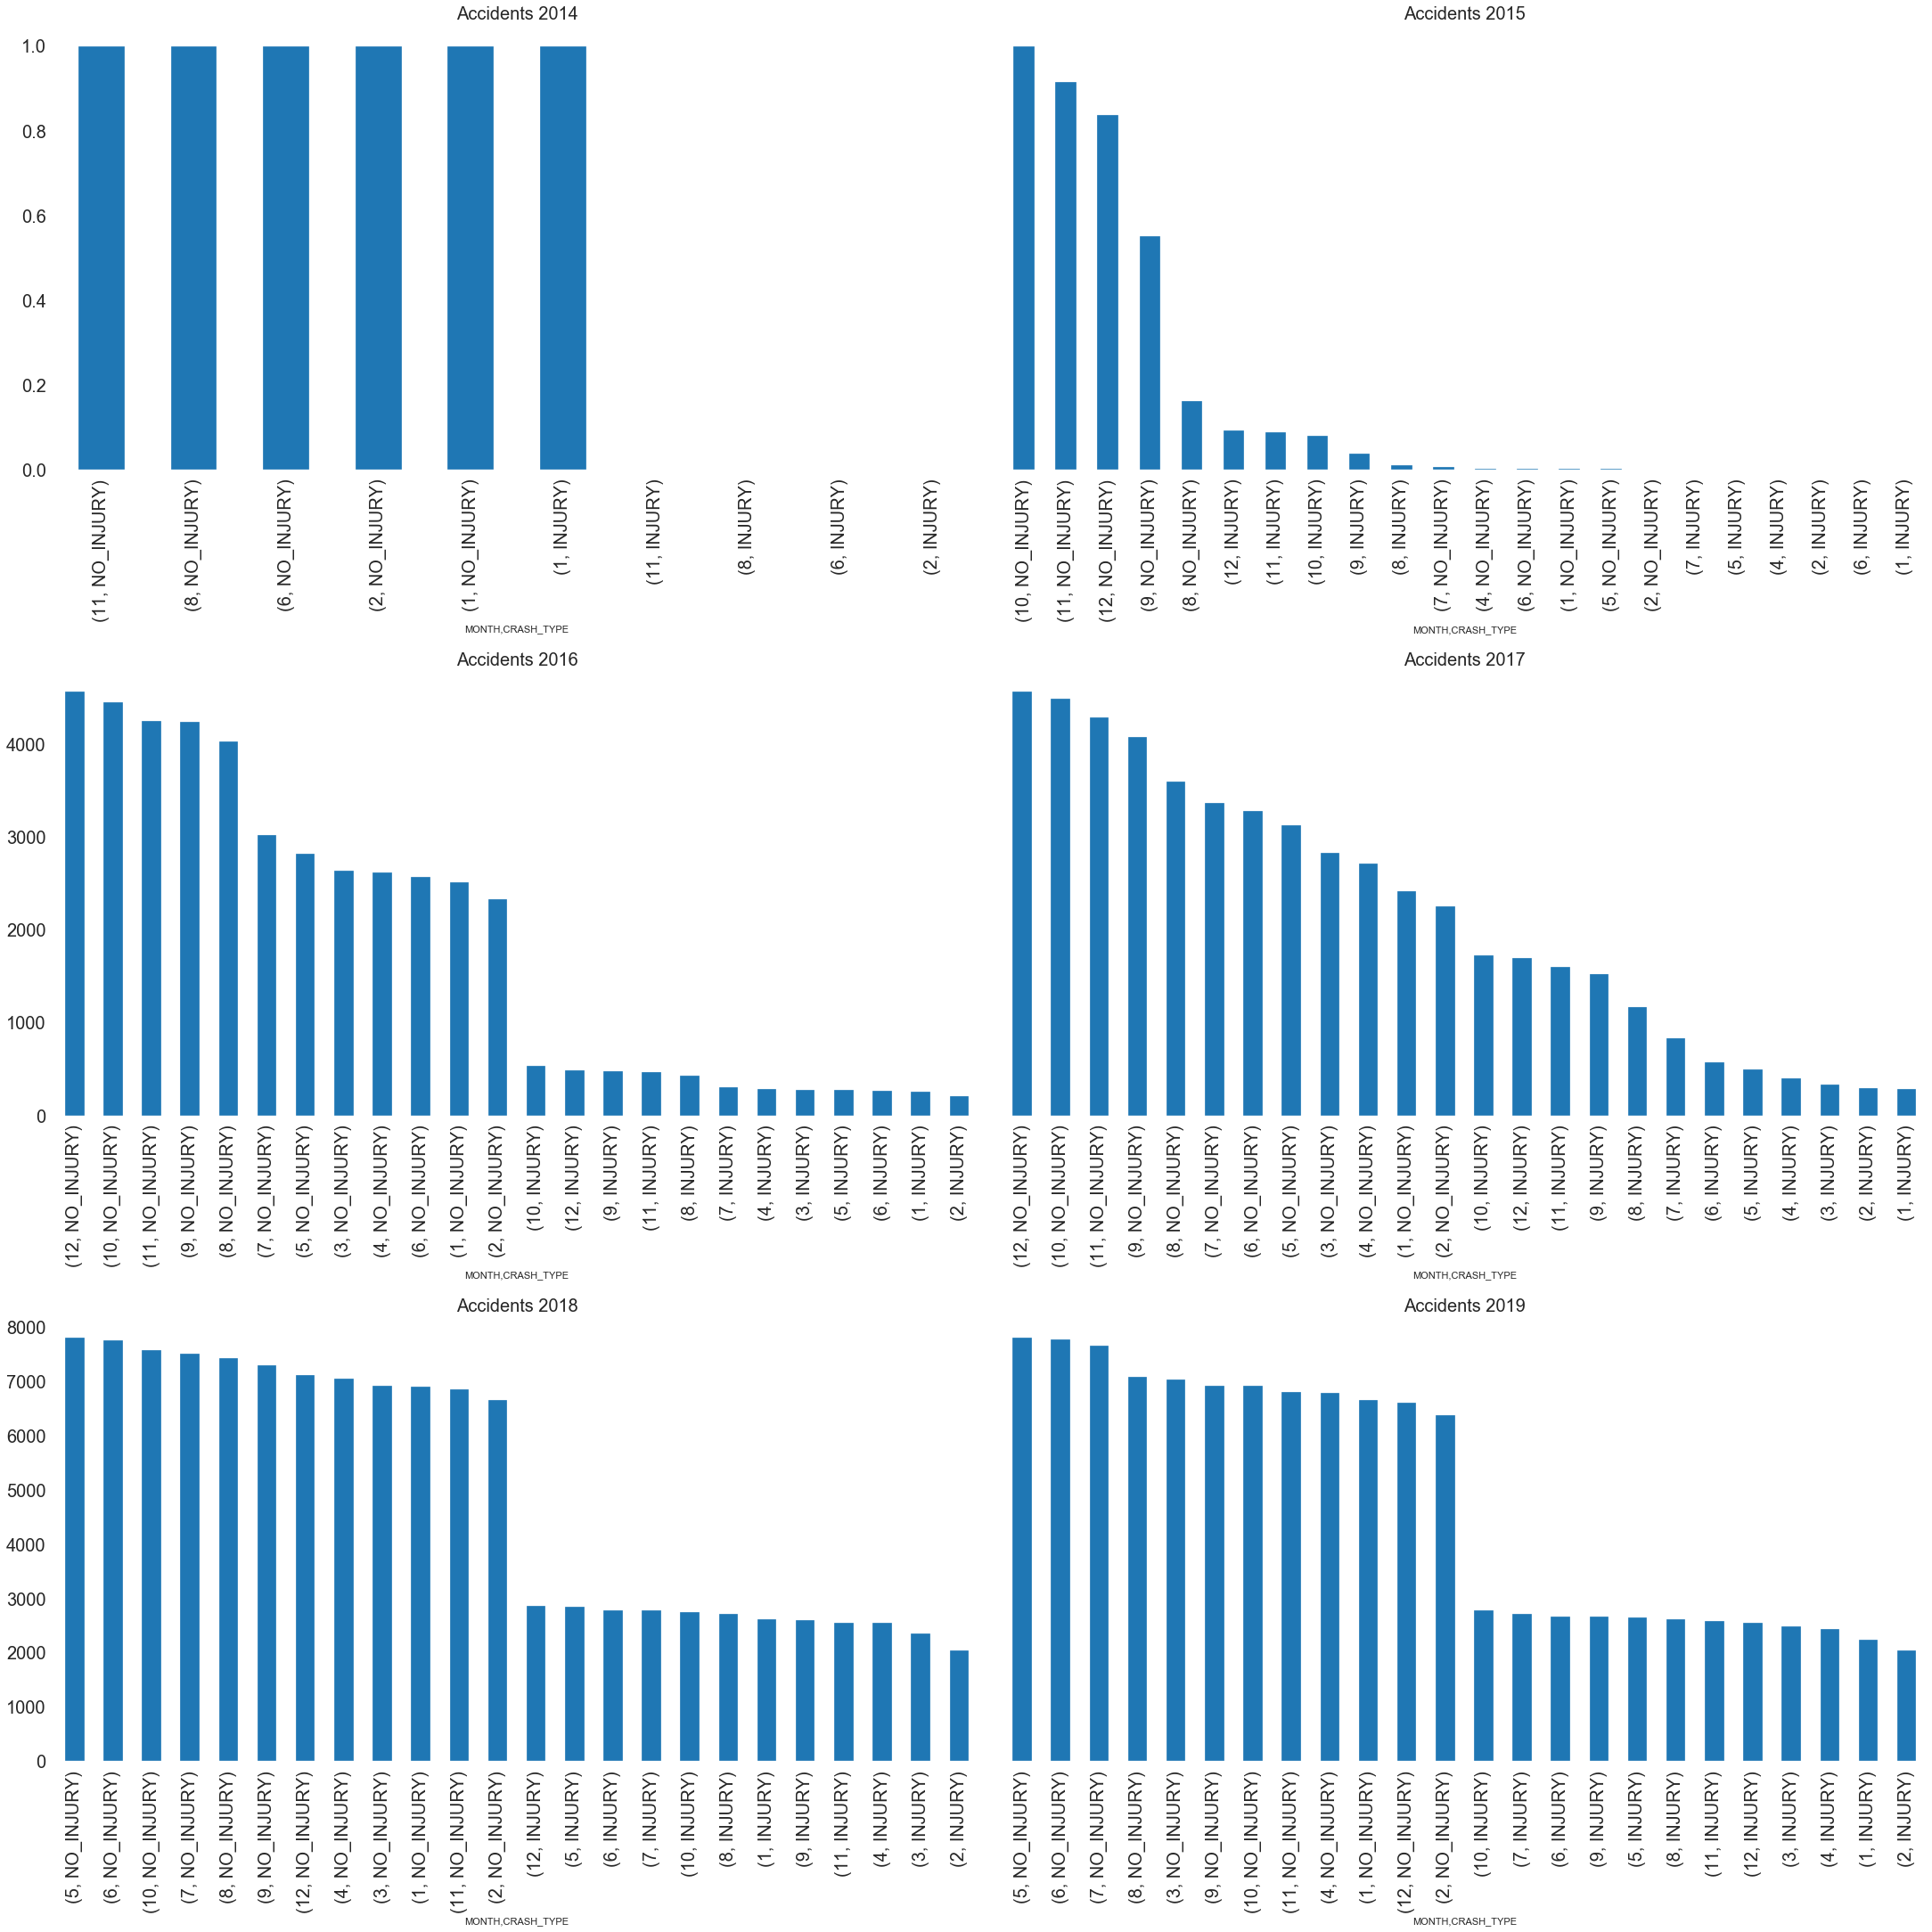

In [4]:

df_new = pd.DataFrame.copy(df)
df_new.replace({'CRASH_TYPE': r'NO INJURY.*$'}, {'CRASH_TYPE': 'NO_INJURY'}, regex=True, inplace=True)
df_new.replace({'CRASH_TYPE': r'INJURY AND.*$'}, {'CRASH_TYPE': 'INJURY'}, regex=True, inplace=True)

df_bytime1 = pd.crosstab(df_new['CRASH_TYPE'],[df_new['YEAR'],df_new['MONTH']])

# Plot of 2014 and 2015 data is very different from 2016, 2017 , 2018 and 2019
# so for our analysis , we are considering only 2017 and above 
# It is possible that data collecting was started as pilot project in 2014 and 2015 so it does not have data about all 
# the incidents. With this reason , lets consider data from 2016 and after 

plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(3,2, frameon=True, sharex=False, constrained_layout=True)

df_view = df_bytime1.loc[:,2014]
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='Accidents 2014', fontsize=20)

df_view = df_bytime1.loc[:,2015]
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[0,1], sharey=True, title='Accidents 2015', fontsize=20)

df_view = df_bytime1.loc[:,2016]
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,0], sharey=True, title='Accidents 2016', fontsize=20)

df_view = df_bytime1.loc[:,2017]
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,1], sharey=True, title='Accidents 2017', fontsize=20)

df_view = df_bytime1.loc[:,2018]
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[2,0], sharey=True, title='Accidents 2018', fontsize=20)

df_view = df_bytime1.loc[:,2019]
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[2,1], sharey=True, title='Accidents 2019', fontsize=20)

for i in range(0,3):
    for j in range(0,2):
        a[i,j].title.set_size(20)


In [41]:
#plt.rcParams["figure.figsize"] = (30,30)
#f, a = plt.subplots(3,2, frameon=True, sharex=False, constrained_layout=True)

df_view = df_bytime1.loc[:,2015]
cols = list(df_view.columns.values)
inds = list(df_view.index.values)
(df_bytime1.explode((2013,3)))
#df_view.boxplot(column=cols,)

YEAR       2013 2014             2015                                         \
MONTH        3    1  2  6  8  11   1  2  4  5  6   7    8     9     10    11   
CRASH_TYPE                                                                     
INJURY        1    1  0  0  0  0    0  0  0  1  0   1   26    95   208   229   
NO_INJURY     0    1  1  1  1  1    2  1  3  2  3  14  421  1430  2600  2379   

YEAR              2016                                                        \
MONTH         12    1     2     3     4     5     6     7     8     9     10   
CRASH_TYPE                                                                     
INJURY       242   256   212   278   281   271   267   303   428   474   539   
NO_INJURY   2174  2509  2328  2643  2623  2822  2572  3018  4033  4239  4458   

YEAR                    2017  ...                                2018        \
MONTH         11    12    1   ...    8     9     10    11    12    1     2    
CRASH_TYPE                    ...                                             
INJURY       466   488   460  ...  1879  2461  2783  2587  2731  2622  2044   
NO_INJURY   4256  4566  3907  ...  5814  6588  7240  6923  7366  6905  6663   

YEAR                                                                    2019  \
MONTH         3     4     5     6     7     8     9     10    11    12    1    
CRASH_TYPE                                                                     
INJURY      2361  2552  2853  2789  2780  2715  2599  2742  2558  2863  2289   
NO_INJURY   6916  7053  7802  7756  7501  7435  7288  7578  6847  7118  6791   

YEAR                                                                          \
MONTH         2     3     4     5     6     7     8     9     10    11    12   
CRASH_TYPE                                                                     
INJURY      2080  2537  2482  2705  2722  2779  2673  2718  2835  2631  2605   
NO_INJURY   6507  7173  6922  7961  7933  7817  7219  7059  7054  6943  6740   

YEAR        2020  
MONTH         1   
CRASH_TYPE        
INJURY      1125  
NO_INJURY   3008  

[2 rows x 66 columns]

In [5]:
# Taking only data of year 2016 and after since the previous years have very varied distributions for which
# the reasons needs to be explored.
# For now, we can assume that the data was collected at limited areas may be because they were running a pilot project.

df = df[df['YEAR']>=2016]


In [6]:
##
##  Describe the meaning and type of data and its scale 
##

'''
The description of data is generated by Pandas profile.
The data consists of 47 features and 377630 rows.
There are 23 categorical variables, 15 numberical and 10 boolean variables.

A brief description of variable is as below. More can be found on the source page 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

RD_NO = Is a unique ID for each crash . This ID can also be used to refer to vehicle database and people database.
        The type of data is TEXT.

CRASH_DATE_EST_I = Crash date estimated by desk officer or reporting party. The type of data is TEXT.

CRASH_DATE = Date and time of crash as entered by the reporting officer. The type of data is Floating time stamp.

POSTED_SPEED_LIMIT = Posted speed limit, as determined by reporting officer. The data is numberical.

TRAFFIC_CONTROL_DEVICE = Traffic control device present at crash location, as determined by reporting officer
DEVICE_CONDITION = Condition of traffic control device, as determined by reporting officer
WEATHER_CONDITION = Weather condition at time of crash, as determined by reporting officer
LIGHTING_CONDITION = Light condition at time of crash, as determined by reporting officer
FIRST_CRASH_TYPE = Type of first collision in crash
TRAFFICWAY_TYPE = Trafficway type, as determined by reporting officer
LANE_CNT = Total number of through lanes in either direction, excluding turn lanes, as determined by reporting officer (0 = intersection)
ALIGNMENT = Street alignment at crash location, as determined by reporting officer
ROADWAY_SURFACE_COND = Road surface condition, as determined by reporting officer
ROAD_DEFECT = Road defects, as determined by reporting officer
REPORT_TYPE = Administrative report type (at scene, at desk, amended)
CRASH_TYPE = A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away
INTERSECTION_RELATED_I = A field observation by the police officer whether an intersection played a role in the crash. 
                        Does not represent whether or not the crash occurred within the intersection. 
                        
NOT_RIGHT_OF_WAY_I = Whether the crash begun or first contact was made outside of the public right-of-way.
HIT_AND_RUN_I = Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid
DAMAGE = A field observation of estimated damage.
DATE_POLICE_NOTIFIED = Calendar date on which police were notified of the crash
PRIM_CONTRIBUTORY_CAUSE = The factor which was most significant in causing the crash, as determined by officer judgment
SEC_CONTRIBUTORY_CAUSE = The factor which was second most significant in causing the crash, as determined by officer judgment
STREET_NO = Street address number of crash location, as determined by reporting officer
STREET_DIRECTION = Street address direction (N,E,S,W) of crash location, as determined by reporting officer
STREET_NAME = Street address name of crash location, as determined by reporting officer
BEAT_OF_OCCURRENCE = Chicago Police Department Beat ID. Boundaries available at https://data.cityofchicago.org/d/aerh-rz74
PHOTOS_TAKEN_I = Whether the Chicago Police Department took photos at the location of the crash
STATEMENTS_TAKEN_I = Whether statements were taken from unit(s) involved in crash
DOORING_I = Whether crash involved a motor vehicle occupant opening a door into the travel path of a bicyclist, causing a crash
WORK_ZONE_I = Whether the crash occurred in an active work zone
WORK_ZONE_TYPE = The type of work zone, if any
WORKERS_PRESENT_I = Whether construction workers were present in an active work zone at crash location
NUM_UNITS = Number of units involved in the crash. A unit can be a motor vehicle, a pedestrian, a bicyclist, or 
            another non-passenger roadway user.Each unit represents a mode of traffic with an independent trajectory.

MOST_SEVERE_INJURY = Most severe injury sustained by any person involved in the crash
INJURIES_TOTAL = Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries as 
                determined by the reporting officer

INJURIES_FATAL = Total persons sustaining fatal injuries in the crash
INJURIES_INCAPACITATING = Total persons sustaining incapacitating/serious injuries in the crash as determined 
                    by the reporting officer. Any injury other than fatal injury, which prevents the injured person from walking, 
                    driving, or normally continuing the activities they were capable of performing before the injury occurred. 
                    Includes severe lacerations, broken limbs, skull or chest injuries, and abdominal injuries.



'''

'\nThe description of data is generated by Pandas profile.\nThe data consists of 47 features and 377630 rows.\nThere are 23 categorical variables, 15 numberical and 10 boolean variables.\n\nA brief description of variable is as below. More can be found on the source page \nhttps://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if\n\nRD_NO = Is a unique ID for each crash . This ID can also be used to refer to vehicle database and people database.\n        The type of data is TEXT.\n\nCRASH_DATE_EST_I = Crash date estimated by desk officer or reporting party. The type of data is TEXT.\n\nCRASH_DATE = Date and time of crash as entered by the reporting officer. The type of data is Floating time stamp.\n\nPOSTED_SPEED_LIMIT = Posted speed limit, as determined by reporting officer. The data is numberical.\n\nTRAFFIC_CONTROL_DEVICE = Traffic control device present at crash location, as determined by reporting officer\nDEVICE_CONDITION = Condition of traffic control devic

In [7]:
'''
 # Missing data and the way to deal with the missing data
 
 CRASH_DATE_EST_I is a TEXT field and it has 92.6% missing values. This field is recorded at the office instead of the crash site.
 This normally happens when it is a minor crash which does not gets immediately reported.
 This also happens when the officer was not called onsite.
 The missing data in this field can be substituted from CRASH_DATE field which has 0% missing data.
 
 POSTED_SPEED_LIMIT has 1.7% of data which is zero. Even though there are speed limits posted every where on streets, 
 there can be parking lots where speed is not posted. We can infer from the feature TRAFFICWAY_TYPE if the location is 
 parking lot or not. If it is parking lot, we can change the POSTED_SPEED to 5 mph. If the location is not parking lot , we can 
 derive the speed limit from suplimentary data about roads information by using the latitude and longitude values from this data set.
 If there are still some values of POSTED_SPEED_LIMIT which are zero, we can delete those rows.
 Also , there are errors in this field which has values like 1 mph , 2 mph as speed limits. We need to use suplimentray data to from 
 roads department data to fix these values. We can bin the values into 3 bins. Bin1 is 0-30 , Bin2 is 30-60 and Bin3 is 60-90.
 
 TRAFFIC_CONTROL_DEVICE and DEVICE_CONTROL has unknown type. We can consider this as error in entry and change it category 'NO CONTROLS' at all.
 
 WEATHER_CONDITION has unknown type. We can get the weather data corresponding to those days and change these values accordingly.
 
 LIGHTING_CONDITION has unknown type . We can change this unknown to , other known types based on time of the day and weather report data.
 
 LANE_CNT has 47% missing data and zeros. We can fix these entries by looking at road and transport department data.
 
 
 INJURIES_INCAPACITATING has zeros. We can consider this as categorical values with a scale 0 to 4. 
 Zero meaning, the INJURIES with least level of INCAPACITATING and 4 is more towards fatal.
 
 INJURIES_NON_INCAPACITATING has zeros. We can consider this as part of the scale from 0 to 4.
 
 HIT_AND_RUN_I has 72% missing. We can consider this field true if the crash report was done at office.
 
 
 
 REPORT_TYPE has 2.3% missing. This field can be derived from CRASH_DATE_EST_I or CRASH_DATE fields.
 
 CRASH_HOUR has 1.7% zeros. If the corresponding LIGHTING condition is available, we can adjust the CRASH_HOUR to fall in 
  average of day time or average of night time . 
  
  INTERSECTION_RELATED_I , drop this column as it has 77% of missing data.
  
 
 '''

"\n # Missing data and the way to deal with the missing data\n \n CRASH_DATE_EST_I is a TEXT field and it has 92.6% missing values. This field is recorded at the office instead of the crash site.\n This normally happens when it is a minor crash which does not gets immediately reported.\n This also happens when the officer was not called onsite.\n The missing data in this field can be substituted from CRASH_DATE field which has 0% missing data.\n \n POSTED_SPEED_LIMIT has 1.7% of data which is zero. Even though there are speed limits posted every where on streets, \n there can be parking lots where speed is not posted. We can infer from the feature TRAFFICWAY_TYPE if the location is \n parking lot or not. If it is parking lot, we can change the POSTED_SPEED to 5 mph. If the location is not parking lot , we can \n derive the speed limit from suplimentary data about roads information by using the latitude and longitude values from this data set.\n If there are still some values of POSTED_

In [8]:

# Uncomment below lines to run pandas profiling

#profile = ProfileReport(df, minimal=True)
#profile

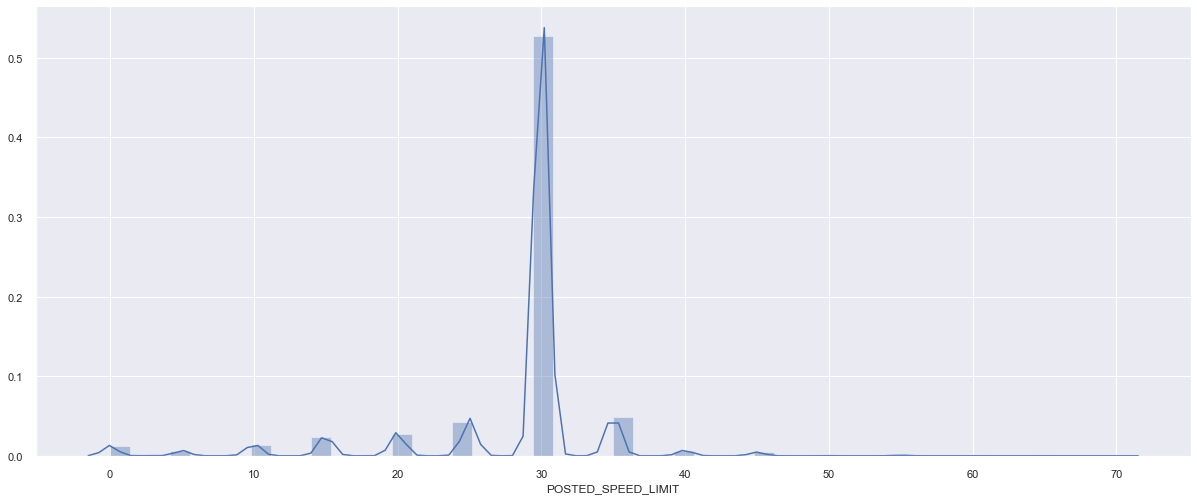

In [9]:
#profile.to_file("crash_data_report.html")
sns.set()
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.distplot(df.POSTED_SPEED_LIMIT,kde=True)

# The histogram below shows that it is centered around 30 and 
# Speed limit column does not have any missing values. Zero speed can be considered as parking lot rather than outlier.

In [11]:
# Lets select few important features and use them to explore the data
# 
df_all5 = df.loc[:,['POSTED_SPEED_LIMIT','ROAD_DEFECT','WEATHER_CONDITION',
                    'LIGHTING_CONDITION','CRASH_TYPE','CRASH_DAY_OF_WEEK',
                    'NUM_UNITS', 'DEVICE_CONDITION','MONTH','YEAR','LATITUDE','LONGITUDE','CRASH_HOUR','PRIM_CONTRIBUTORY_CAUSE']]


# Remove all rows with zero latitude and longitude
df_all5 = df_all5[df_all5['LATITUDE'] != 0]
df_all5 = df_all5[df_all5['LONGITUDE'] != 0]

bseries = pd.notnull(df_all5['LATITUDE'])
df_all5 = df_all5[bseries]

bseries = pd.notnull(df_all5['LONGITUDE'])
df_all5 = df_all5[bseries]

# Normalize
df_all5['LATITUDE'] = (df_all5['LATITUDE'] - df_all5['LATITUDE'].mean())/df_all5['LATITUDE'].std()
df_all5['LONGITUDE'] = (df_all5['LONGITUDE'] - df_all5['LONGITUDE'].mean())/df_all5['LONGITUDE'].std()


# Rename these columns to shorter names for better readibility of visuals
#
df_all_copy = pd.DataFrame.copy(df_all5)
df_all_copy.rename(columns={'POSTED_SPEED_LIMIT':'SP_LIM',
                            'ROAD_DEFECT':'ROAD', 
                            'LIGHTING_CONDITION':'LIGHT',
                            'WEATHER_CONDITION':'WEATHER',
                            'CRASH_DAY_OF_WEEK':'WEEKDAY',
                            'CRASH_TYPE':'CRASH',
                            'DEVICE_CONDITION':'DEVICE'}, inplace=True)

# Lets categorize the CRASH_TYPE to 2 levels. INJURY or NO_INJURY.
# All injury types are counted under INJURY

df_all_copy.replace({'CRASH': r'NO INJURY.*$'}, {'CRASH': 'NO_INJURY'}, regex=True, inplace=True)
df_all_copy.replace({'CRASH': r'INJURY AND.*$'}, {'CRASH': 'INJURY'}, regex=True, inplace=True)

# Lets categorize lighting condition into 3 types. Day light, lighted streets and poorly light streets.
# 
df_all_copy.replace(to_replace=r'DARKNESS, LIGHTED.*$', value='LIGHTED', regex=True, inplace=True)
df_all_copy.replace({'LIGHT': r'^(UNKNOWN|DUSK|DAWN).*$'}, {'LIGHT': 'POOR_LIGHT'}, regex=True, inplace=True)

# Weather condition into 2 categories. Clear or not clear
df_all_copy.replace({'WEATHER': r'^(?!CLEAR).*$'}, {'WEATHER': 'NO_CLEAR'}, regex=True, inplace=True)

# Road condition as defective or not defective 
df_all_copy.replace({'ROAD': r'^(?!NO DEFECTS).*$'}, {'ROAD': 'DEFECTIVE'}, regex=True, inplace=True)
df_all_copy.replace({'ROAD': r'^NO DEFECTS.*$'}, {'ROAD': 'NO_DEFECT'}, regex=True, inplace=True)

# Divide device condition into 3 categories
# No controls, working controls, defective controls
#df_all_copy.replace({'DEVICE_CONDITION': r'^(NO CONTROLS).*$'}, {'DEVICE_CONDITION': 'NO'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(?!(NO CONTROLS)|(FUNCTIONING PROPERLY)).*$'},
                    {'DEVICE': 'DEFECTIVE'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(NO CONTROLS).*$'}, {'DEVICE': 'NO'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(FUNCTIONING PROPERLY).*$'}, {'DEVICE': 'WORKING'}, regex=True, inplace=True)
df_all_copy.replace({'LIGHT': r'^(UNKNOWN|DUSK|DAWN).*$'}, {'LIGHT': 'POOR_LIGHT'}, regex=True, inplace=True)



In [12]:

# Convert speed limit to integer
df_all_copy['SP_LIM'] = df_all_copy['SP_LIM'].astype(int)

#df_all_copy['PRIM_CONTRIBUTORY_CAUSE'] = df_all_copy['PRIM_CONTRIBUTORY_CAUSE'].astype('category')

# Bin the speeds to 3 levels, Low , medium and high
df_all_copy['BINNED_SPEED'] = pd.cut((df_all_copy['SP_LIM']), 3, labels=['L','M','H'])

# For crash type ( injury or no) get the count of accidents based on speed limit and road condition
df_crosstab1 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy['BINNED_SPEED'], df_all_copy['ROAD']])

# For crash type , get the count of accidents based on speed limit and weather condition
df_crosstab2 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy.BINNED_SPEED, df_all_copy.WEATHER])

# For crash type, get the count of accidents based on speed limit and lighting condition
df_crosstab3 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy.BINNED_SPEED, df_all_copy.LIGHT])

# For each speed type , get the count of accidents with weather and lighting conditions
df_crosstab4 = pd.crosstab(df_all_copy['BINNED_SPEED'], [df_all_copy.WEATHER, df_all_copy.LIGHT])

# For each crash type, get count of accidents with lighting, road condition, speed limit and traffic control device
df_crosstab5 = pd.crosstab(df_all_copy['CRASH'],[df_all_copy['LIGHT'], df_all_copy['ROAD'], df_all_copy['DEVICE']] )

# For each crash typ e, get count of accidents for a particular year and month of that year
df_bytime = pd.crosstab(df_all_copy['CRASH'],[df_all_copy['YEAR'],df_all_copy['MONTH']])
#print(df_bytime)



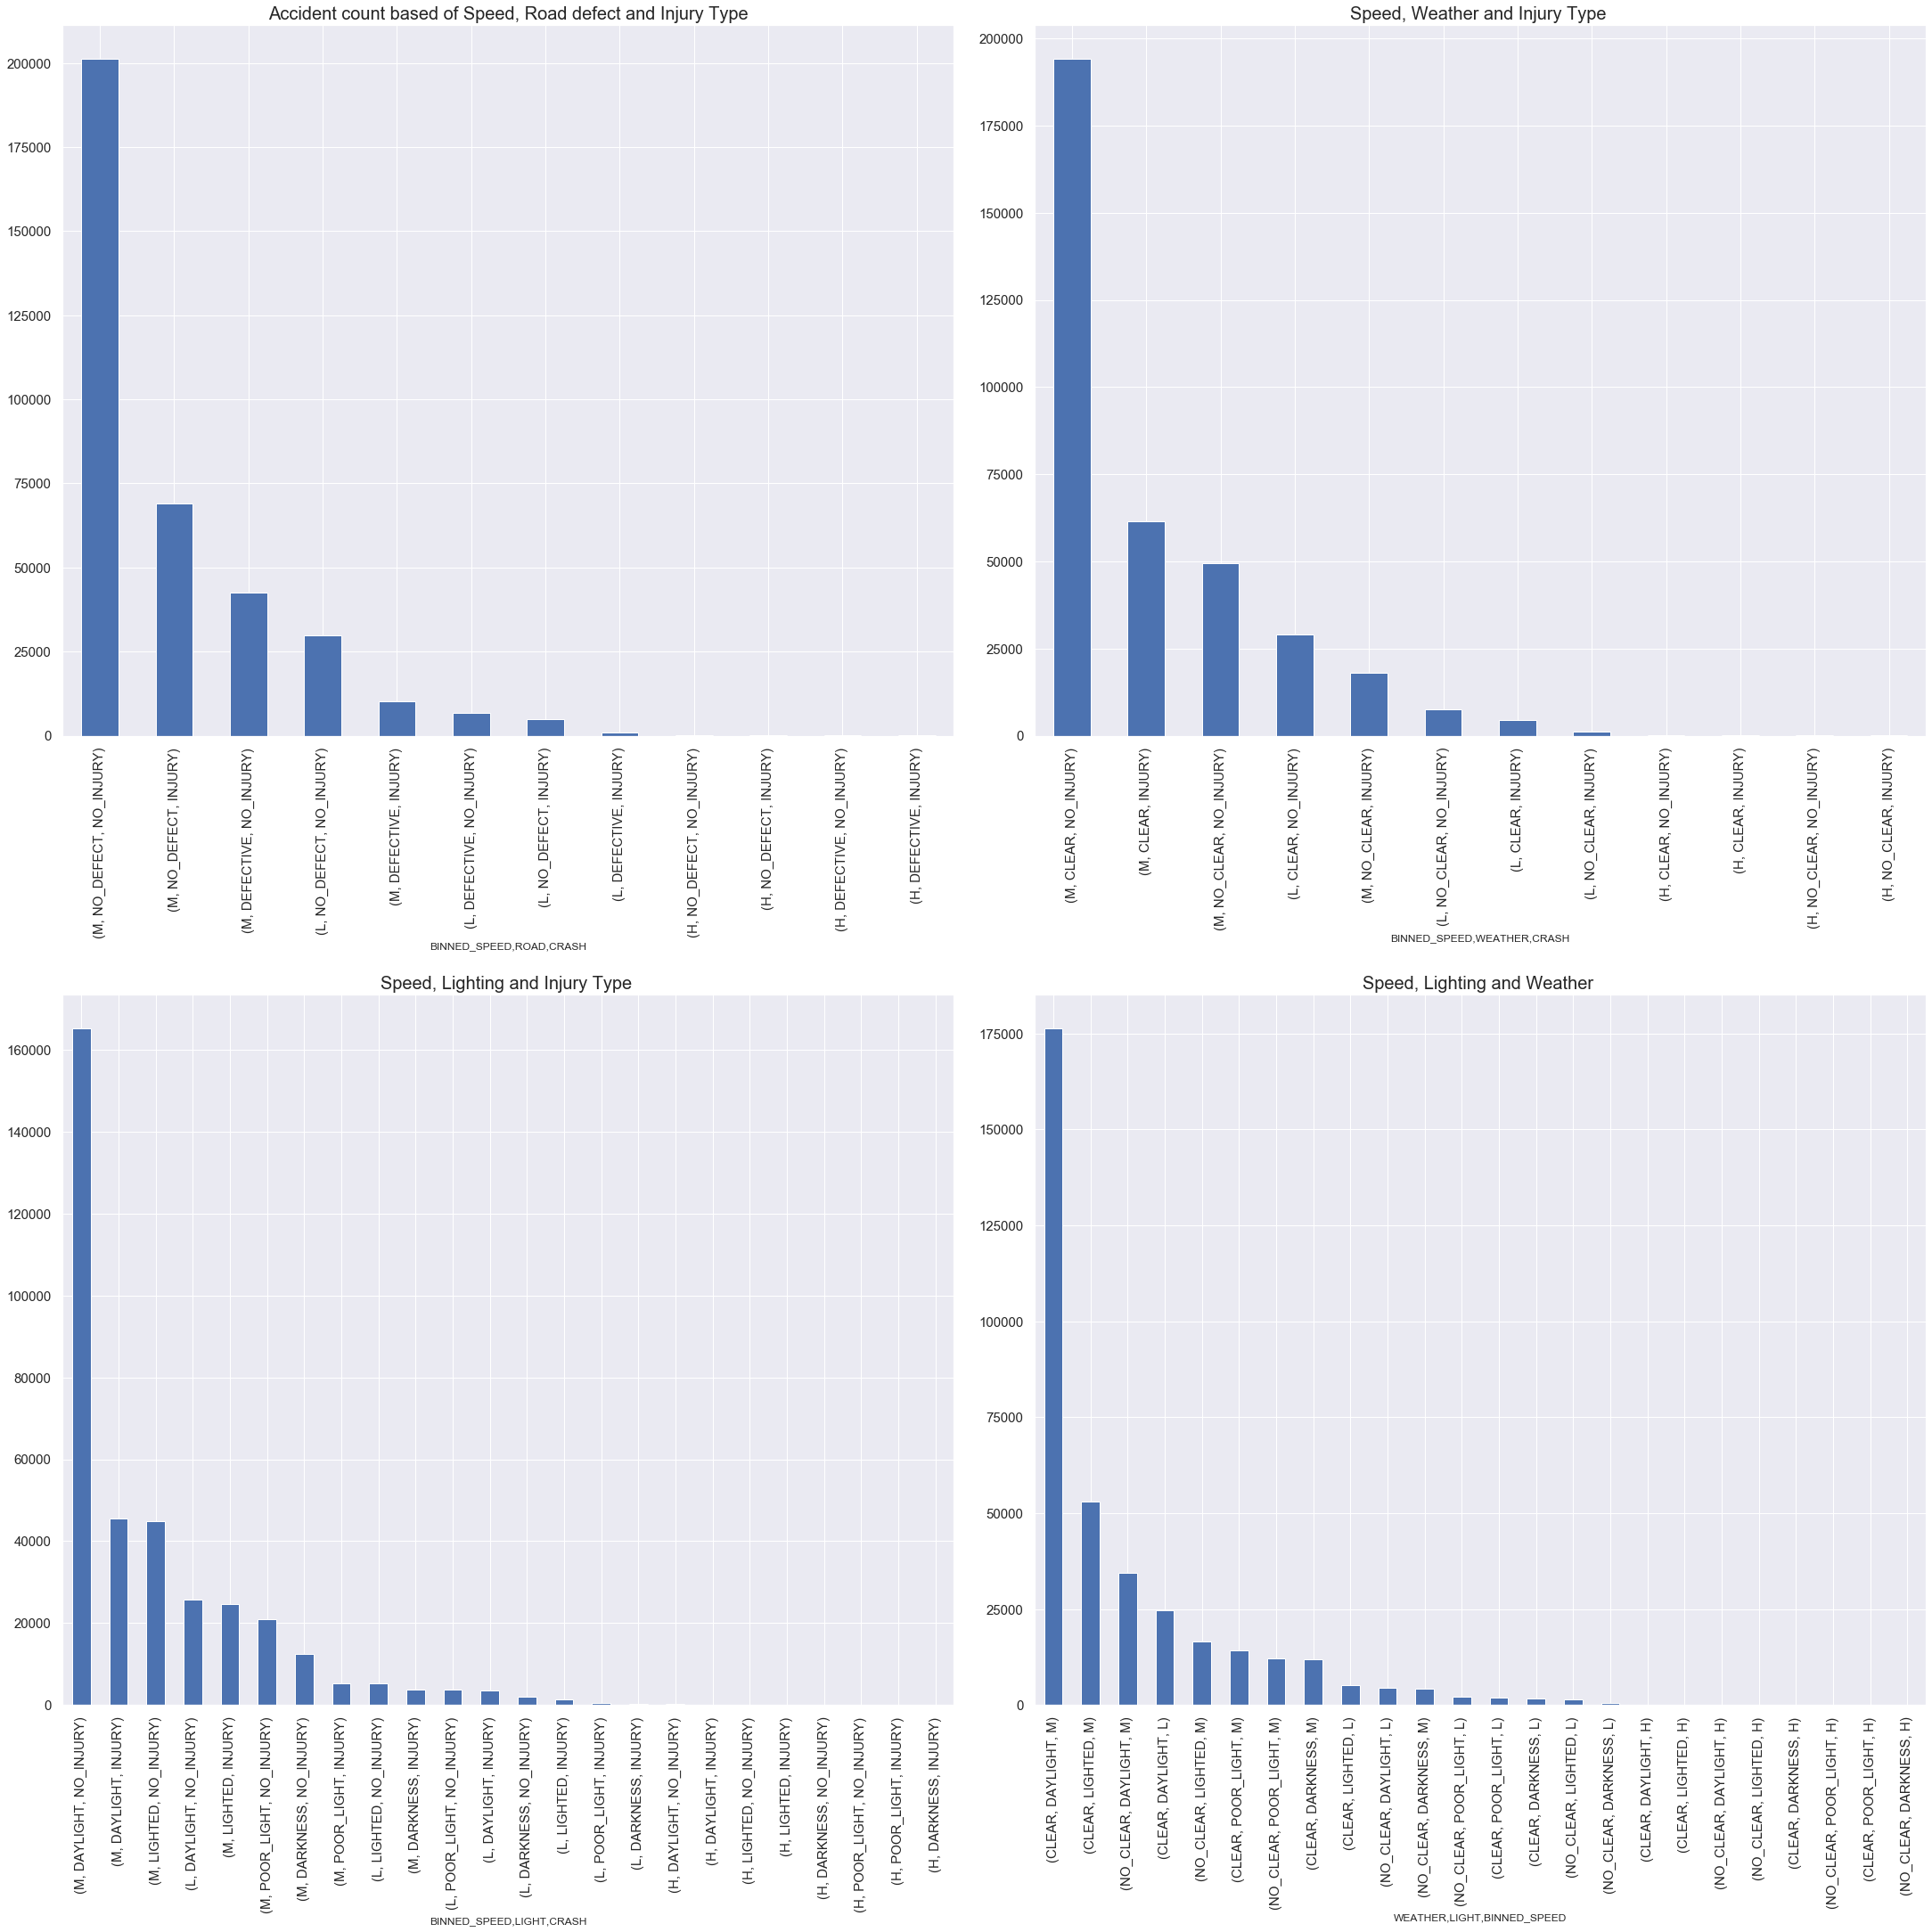

In [13]:

plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(2,2, frameon=True, sharex=False, constrained_layout=True)

df_view = df_crosstab1.unstack().sort_values(ascending=False)
df_view.plot(kind='bar', ax=a[0,0], fontsize=15, title='Accident count based of Speed, Road defect and Injury Type')

df_view = df_crosstab2
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[0,1], fontsize=15, title='Speed, Weather and Injury Type ')

df_view = df_crosstab3
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,0], fontsize=15, title='Speed, Lighting and Injury Type ' )

df_view = df_crosstab4
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,1], fontsize=15, title='Speed, Lighting and Weather ')

for i in range(0,2):
    for j in range(0,2):
        a[i,j].title.set_size(20)

# From the bar charts below , we can see that majority of accidents (with and without injury) 
# happened at Medium speed , in daylight, clear weather and non-defcetive roads


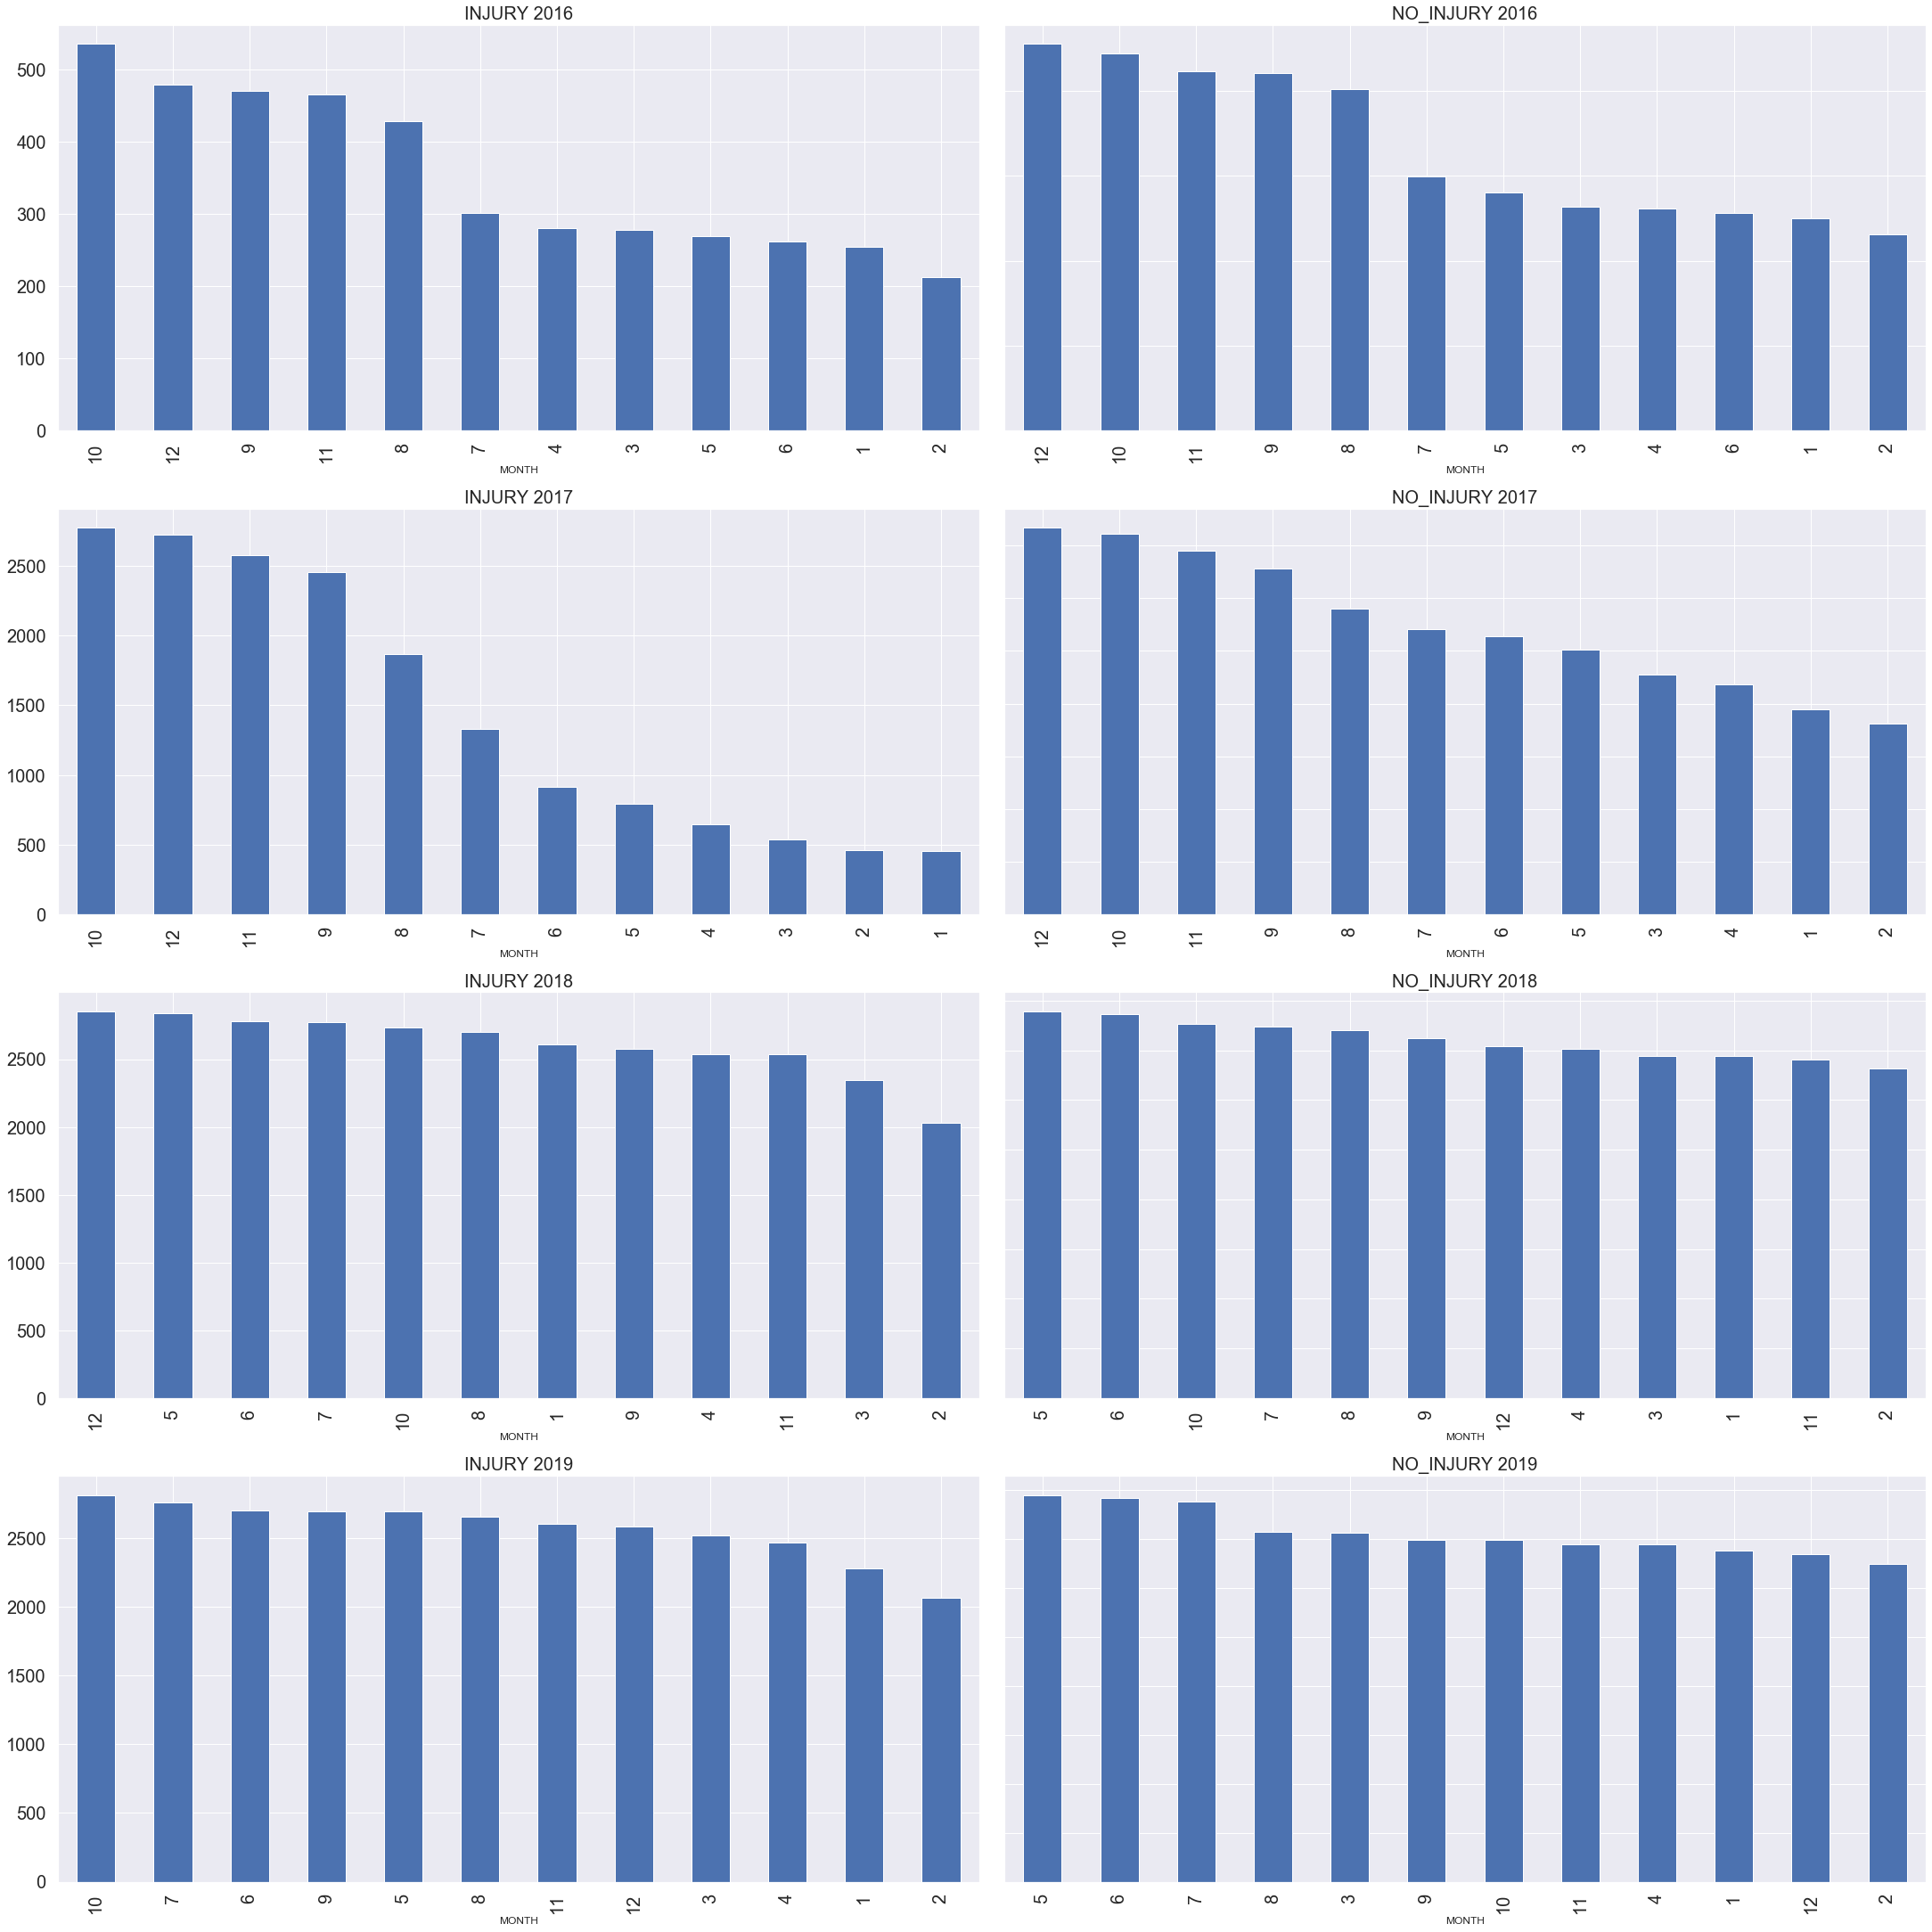

In [14]:
plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(4,2, frameon=True, sharex=False, constrained_layout=True)


df_view = df_bytime.xs('INJURY').xs(2016)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='INJURY 2016', fontsize=20)

df_view = df_bytime.xs('NO_INJURY').xs(2016)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,1], sharey=True, title='NO_INJURY 2016', fontsize=20)


df_view = df_bytime.xs('INJURY').xs(2017)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[1,0], sharey=True, title='INJURY 2017', fontsize=20)

df_view = df_bytime.xs('NO_INJURY').xs(2017)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[1,1], sharey=True, title='NO_INJURY 2017', fontsize=20)

df_view = df_bytime.xs('INJURY').xs(2018)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[2,0], sharey=True, title='INJURY 2018', fontsize=20)

df_view = df_bytime.xs('NO_INJURY').xs(2018)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[2,1], sharey=True, title='NO_INJURY 2018', fontsize=20)

df_view = df_bytime.xs('INJURY').xs(2019)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[3,0], sharey=True, title='INJURY 2019', fontsize=20)

df_view = df_bytime.xs('NO_INJURY').xs(2019)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[3,1], sharey=True, title='NO_INJURY 2019', fontsize=20)


for i in range(0,4):
    for j in range(0,2):
        a[i,j].title.set_size(20)

# Most of the accidents with injury happen towards the end of the year.
# Is holiday season the cause ?
        
        

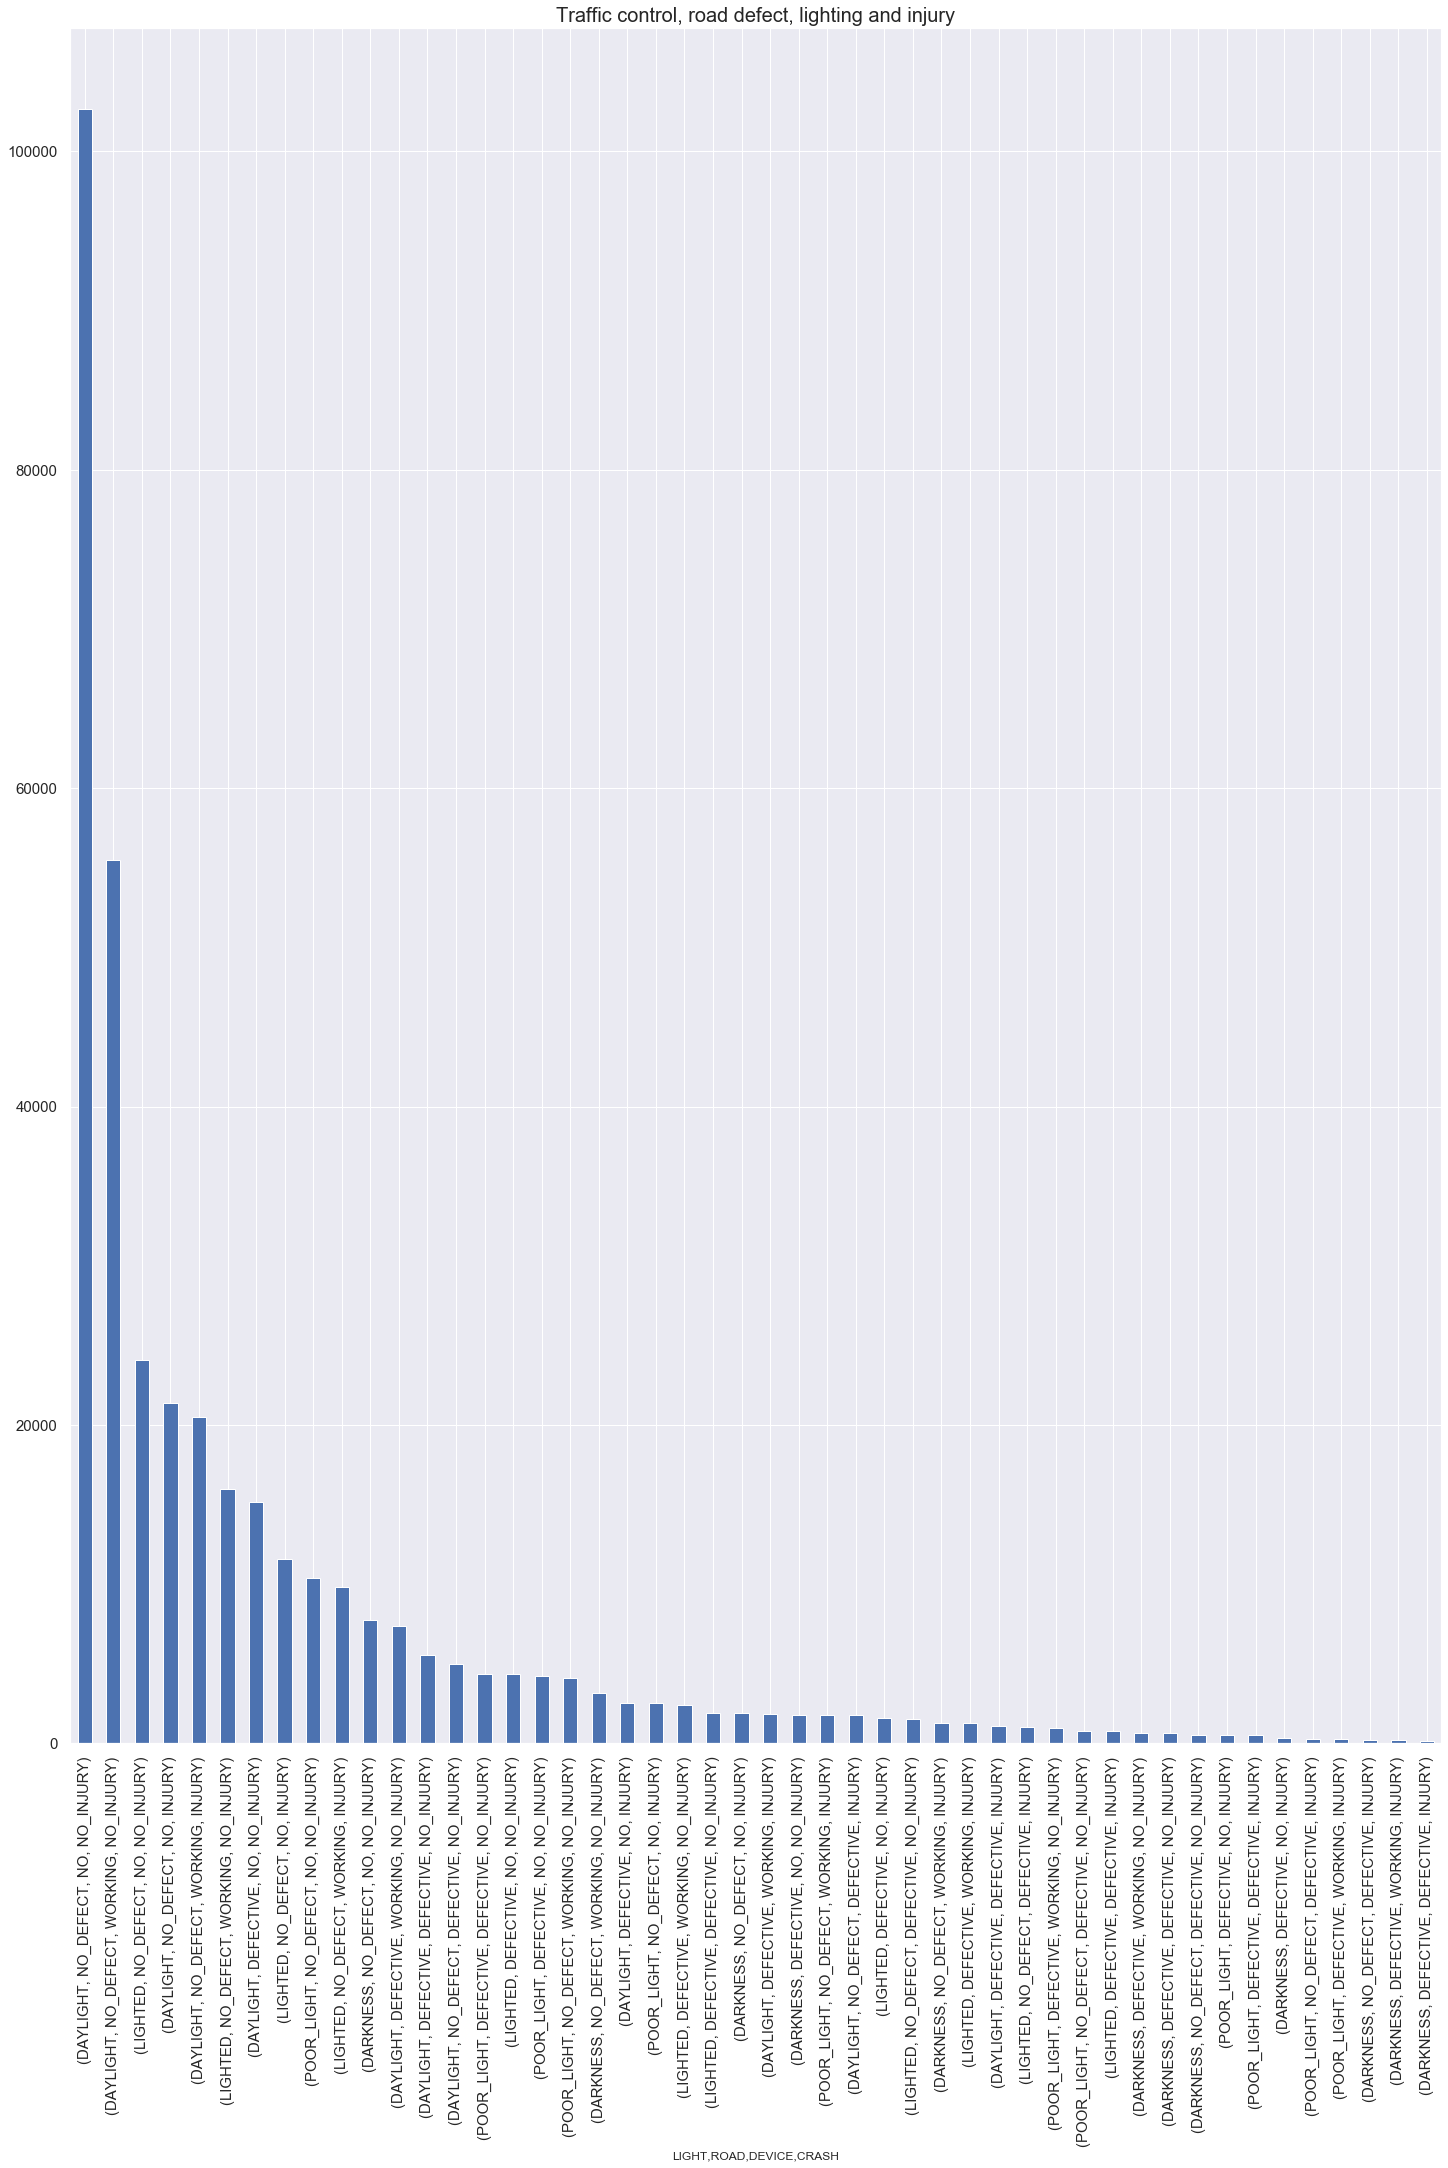

In [15]:
plt.rcParams["figure.figsize"] = (20,30)
f, a = plt.subplots(1,1, frameon=True, sharex=False, constrained_layout=True)

df_view = df_crosstab5
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a, fontsize=15, title='Traffic control, road defect, lighting and injury')
a.title.set_size(20)

# Most non-injurious accidents happen when there is no control device.
# When traffic device is in working condition, the non-injurious accients are half the number with out control device.

In [21]:

#print(df_all_copy.columns)
#frames = [df_all_copy,pd.get_dummies(df_all_copy, columns=['CRASH','ROAD','DEVICE','LIGHT','WEATHER','BINNED_SPEED']), ]
#df_all_copy1 = pd.concat(frames, axis=1)

df_all_copy1 = pd.get_dummies(df_all_copy, columns=['CRASH','ROAD','DEVICE','LIGHT','WEATHER','BINNED_SPEED', 'PRIM_CONTRIBUTORY_CAUSE'])
#print((df_all_copy1.columns))

#y = (df_all_copy1['CRASH_INJURY']).values
X = df_all_copy1.drop(columns=['CRASH_NO_INJURY',
                              'WEATHER_CLEAR',
                              'ROAD_NO_DEFECT','SP_LIM', 
                               'NUM_UNITS','DEVICE_WORKING'])
#print((X.columns))

from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.drop('CRASH_INJURY',axis=1), 
                                                    X['CRASH_INJURY'], stratify=X['MONTH'],test_size=0.30, 
                                                    random_state=100)



# Under sampling of NO_INJURY cases is required since there are number of instances for NO_INJURY 
# exceeds the INJURY instance by twice or more

y1= (pd.DataFrame(y_train))
from sklearn.utils import resample

X1 = pd.concat([X_train,y1], axis=1)

filt = X1['CRASH_INJURY'] == 0
majority = X1[filt]

filt2 = X1['CRASH_INJURY'] == 1
minority = X1[filt2]
# We want the length of majority  to be the same as length of minority
majority_downsampled = resample(majority, replace=False, n_samples = len(minority))
new_sample = pd.concat([majority_downsampled, minority])

y_train = (new_sample['CRASH_INJURY'])
X_train = new_sample.drop(columns=['CRASH_INJURY'])

model_cols = X_train.columns.values




# for one vs other liblinear is suggested.

clf = logreg(solver='liblinear',random_state=4).fit(X_train[model_cols].values, y_train.values)

# Model co-efficients 
all_coeffs = dict(zip(model_cols, clf.coef_[0]))

for key,value in all_coeffs.items():
    print('{}:{}'.format(key,value))

predictions = clf.predict(X_test.values)


from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))



WEEKDAY:-0.0021280649718571497
MONTH:0.020229651929434257
YEAR:0.003253187688700269
LATITUDE:-0.11343574597688745
LONGITUDE:-0.06737175863973827
CRASH_HOUR:-0.023588669764698606
ROAD_DEFECTIVE:-0.27942646545041566
DEVICE_DEFECTIVE:-0.09455280844876161
DEVICE_NO:-0.25066548608789174
LIGHT_DARKNESS:-0.8963611755839839
LIGHT_DAYLIGHT:-1.0953940397460256
LIGHT_LIGHTED:-0.4701312610188409
LIGHT_POOR_LIGHT:-1.0808594997678134
WEATHER_NO_CLEAR:0.11375723413776404
BINNED_SPEED_L:-1.5727633713526692
BINNED_SPEED_M:-1.0493533337881644
BINNED_SPEED_H:-0.9206292712040743
PRIM_CONTRIBUTORY_CAUSE_ANIMAL:-0.4971144277106728
PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT:-0.48950281221707626
PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING:-0.13993998802483115
PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS:0.4793740243805554
PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS:-0.016116843403735967
PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN:0.5352876154607519
PRIM_

In [18]:

def prob(coef):
    return (math.exp(coef)/(1+math.exp(coef)))

print ('''Interpreting the co-efficients
        The model is trained for looking for 1 (INJURY cases)''')
print (' The intercept of the model is {}'.format(clf.intercept_[0]))
intercept = clf.intercept_[0]
print ('Propability of accident being injurious is {}'.format( prob(intercept))) 

for key in all_coeffs.keys():
    print ('Probability of accident being injurious due to {} is {}'.format(key, prob(all_coeffs[key])))
    



Interpreting the co-efficients
        The model is trained for looking for 1 (INJURY cases)
 The intercept of the model is -3.4835083852270086
Propability of accident being injurious is 0.02978512715410501
Probability of accident being injurious due to WEEKDAY is 0.4993560914884608
Probability of accident being injurious due to MONTH is 0.505096140219548
Probability of accident being injurious due to YEAR is 0.5008049094827313
Probability of accident being injurious due to LATITUDE is 0.4714191767199166
Probability of accident being injurious due to LONGITUDE is 0.4830133287833199
Probability of accident being injurious due to CRASH_HOUR is 0.49457880429180534
Probability of accident being injurious due to ROAD_DEFECTIVE is 0.4252416826787274
Probability of accident being injurious due to DEVICE_DEFECTIVE is 0.48655979286306283
Probability of accident being injurious due to DEVICE_NO is 0.4365559120083272
Probability of accident being injurious due to LIGHT_DARKNESS is 0.3009814184756

In [453]:
dir(clf)
clf.intercept_[0]
import math
math.exp(clf.intercept_[0])

0.05608547647213249

In [349]:
clf.coef_
#X_train.features()
dfx = pd.DataFrame(y_test)
#dfx.plot.hist()

In [420]:
print(type(X_train))
y1= (pd.DataFrame(y_train))
from sklearn.utils import resample

X1 = pd.concat([X_train,y1], axis=1)

filt = X1['CRASH_INJURY'] == 0
majority = X1[filt]
majority

filt2 = X1['CRASH_INJURY'] == 1
minority = X1[filt2]
# We want the length of majority  to be the same as length of minority
majority_downsampled = resample(majority, replace=False, n_samples = len(minority))
new_sample = pd.concat([majority_downsampled, minority])
df_all_copy
dfx1 = pd.get_dummies(df_all_copy, columns=['CRASH','ROAD','DEVICE','LIGHT','WEATHER','BINNED_SPEED'])
(dfx1['CRASH_INJURY'] == 1).sum()

(new_sample['CRASH_INJURY'] == 0).sum()

<class 'pandas.core.frame.DataFrame'>


59535

In [ ]:
print(1)